In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

In [2]:
h_a = np.loadtxt('../../Data/data_39_highSI.txt', dtype=float)

# h_a = h_a * 0.1242
h_a = h_a[h_a>0]
h_a = h_a[1::20]

avr = np.average(h_a)
h_a = h_a/avr
h_a = h_a.reshape(-1,1)

In [3]:
N_train = 7500
N_test = 2500
timesteps = 20

train_data = h_a[:N_train].reshape(-1,1)
test_data = h_a[N_train:(N_train + N_test)].reshape(-1,1)

In [4]:
train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(0,len(train_data)-timesteps+1)])[:,:,0]
train_data_timesteps.shape

test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,0]
test_data_timesteps.shape

(995, 6)

In [5]:
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3495, 5) (3495, 1)
(995, 5) (995, 1)


In [6]:
model = SVR(kernel='rbf',gamma=2.8, C=100, epsilon = 0.01)
model.fit(x_train, y_train[:,0])
# SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
#     kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

SVR(C=100, epsilon=0.001, gamma=2.8)

In [7]:
y_train_pred = model.predict(x_train).reshape(-1,1)
y_test_pred = model.predict(x_test).reshape(-1,1)

print(y_train_pred.shape, y_test_pred.shape)

(3495, 1) (995, 1)


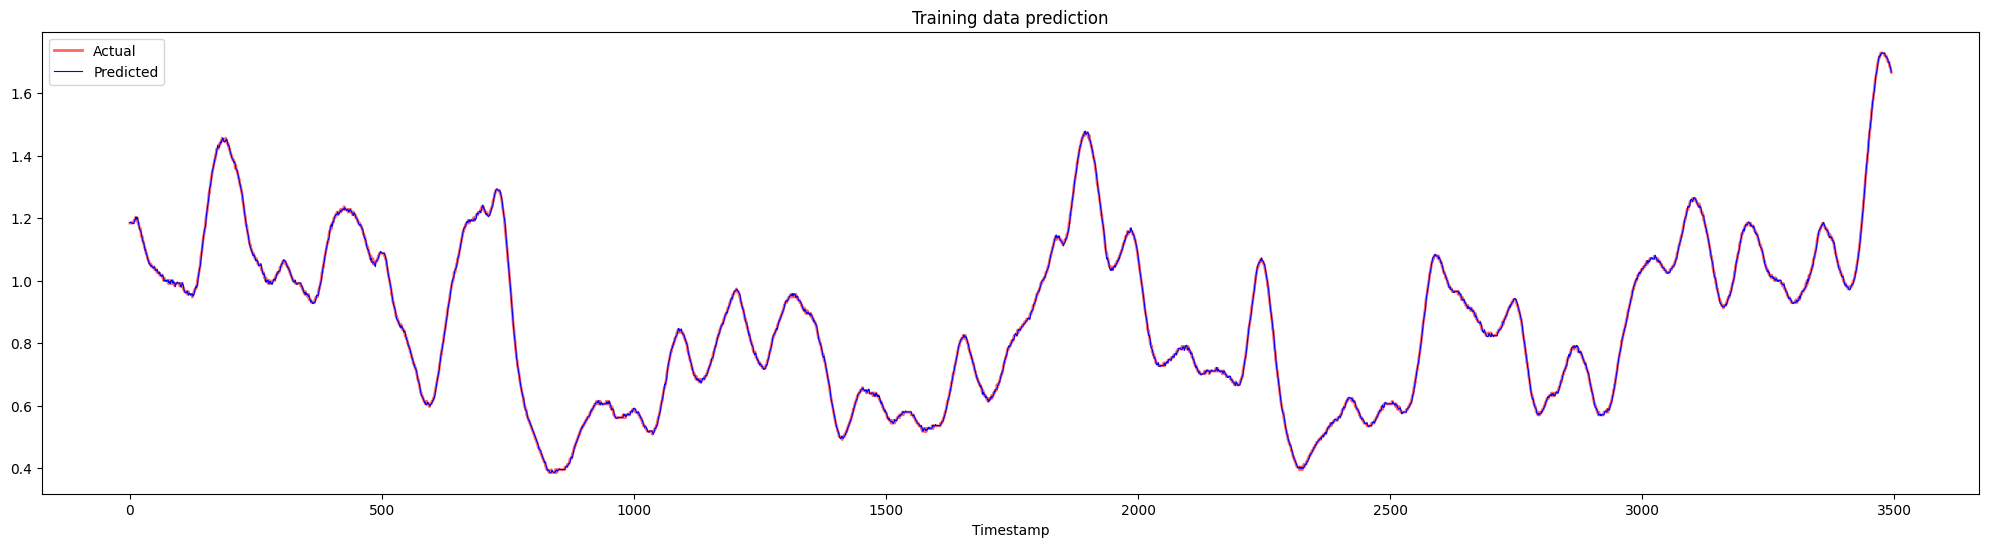

In [8]:
plt.figure(figsize=(25,6))
plt.plot(y_train, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(y_train_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

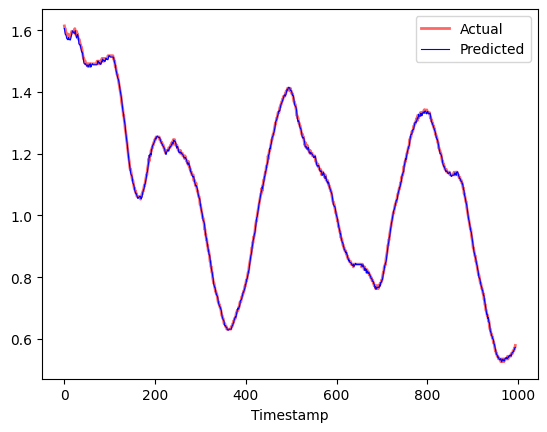

In [9]:
# plt.figure(figsize=(10,3))
plt.plot(y_test, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

In [10]:
print('RMSE for training data: ', math.sqrt(mean_squared_error(y_train_pred, y_train)))
print('RMSE for testing data: ', math.sqrt(mean_squared_error(y_test_pred, y_test)))

RMSE for training data:  0.0048389283757495965
RMSE for testing data:  0.005529136300224386


# Check model performance on full dataset

In [15]:
data_timesteps=np.array([[j for j in h_a[i:i+timesteps]] for i in range(0,len(h_a)-timesteps+1)])[:,:,0]
print("Tensor shape: ", data_timesteps.shape)

# Selecting inputs and outputs from data
X, Y = data_timesteps[:,:timesteps-1],data_timesteps[:,[timesteps-1]]
print("X shape: ", X.shape,"\nY shape: ", Y.shape)

Tensor shape:  (838832, 6)
X shape:  (838832, 5) 
Y shape:  (838832, 1)


In [12]:
# Make model predictions
Y_pred = model.predict(X).reshape(-1,1)

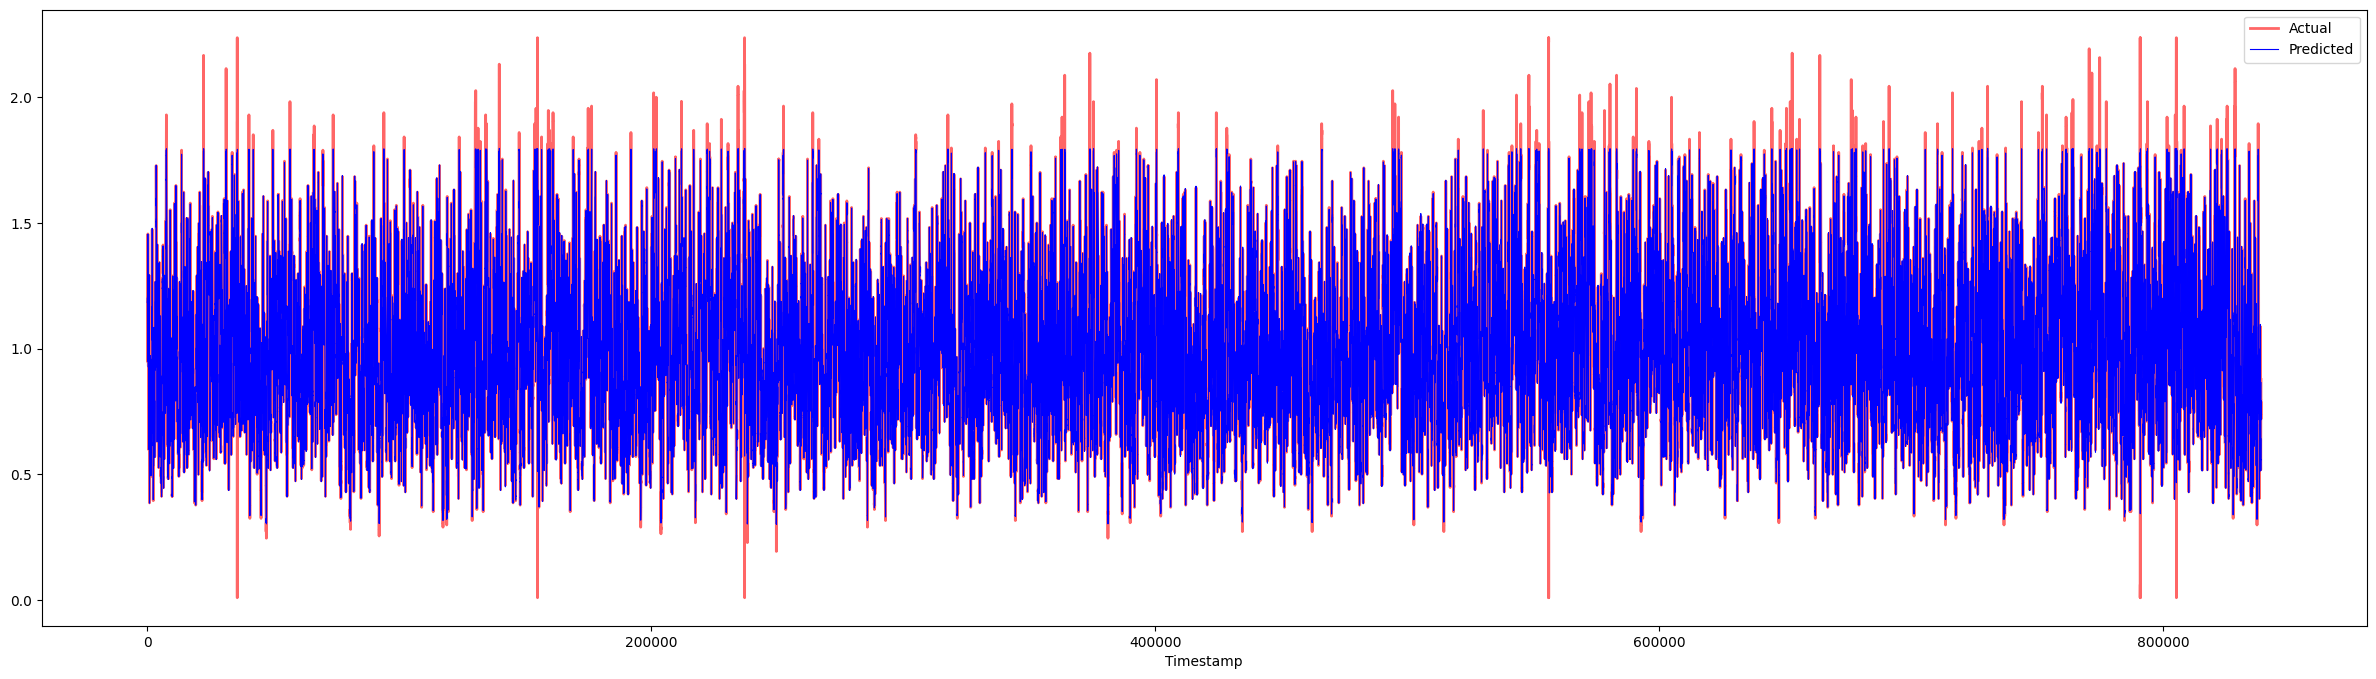

In [13]:
plt.figure(figsize=(30,8))
plt.plot(Y, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(Y_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

In [14]:
print('RMSE: ', math.sqrt(mean_squared_error(Y, Y_pred)))

RMSE:  0.03218587622445332
